In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
import mysql.connector
import mysql.connector as mariadb


def get_db_connection():
    con = mariadb.connect(host='localhost', port= 3306,user="",password="",database="creditcard_capstone")
    return con

In [3]:
#Create a multi-bar plot that shows the total number of approved applications per each application demographic. 
sql_query = "select Application_ID,Credit_History,Dependents,Education,Gender,Income,Married,Self_Employed from cdw_sapp_loan_application where Application_Status='Y'"
db_con = get_db_connection()
cursor = db_con.cursor()  
cursor.execute(sql_query,)
dataset_full = pd.DataFrame(cursor.fetchall(), columns = ['Application_ID','Credit_History','Dependents','Education','Gender','Income','Married','Self_Employed'])
dataset_full.head()

,Application_ID,Credit_History,Dependents,Education,Gender,Income,Married,Self_Employed
0,LP001002,1,0,Graduate,Male,medium,No,No
1,LP001005,1,0,Graduate,Male,low,Yes,Yes
2,LP001006,1,0,Not Graduate,Male,low,Yes,No
3,LP001008,1,0,Graduate,Male,medium,No,No
4,LP001011,1,2,Graduate,Male,medium,Yes,Yes


In [11]:
grouped=['Dependents','Education','Gender','Income','Married','Self_Employed']
print(grouped)


['Dependents', 'Education', 'Gender', 'Income', 'Married', 'Self_Employed']


In [13]:
pd_g = dataset_full.groupby(grouped)['Application_ID'].count().reset_index()

In [14]:
pd_g.head(5)

,Dependents,Education,Gender,Income,Married,Self_Employed,Application_ID
0,0,Graduate,Female,high,No,No,1
1,0,Graduate,Female,high,No,Yes,1
2,0,Graduate,Female,low,No,No,15
3,0,Graduate,Female,low,Yes,No,7
4,0,Graduate,Female,medium,No,No,9


In [15]:
pd_g['Demographics'] =  pd_g['Dependents'] + "_" + pd_g['Education'] + "_" + pd_g['Gender'] + \
                       "_" + pd_g['Income'] +  "_"  +pd_g['Married'] + "_" + pd_g['Self_Employed']

In [16]:
pd_g.head(5)

,Dependents,Education,Gender,Income,Married,Self_Employed,Application_ID,Demographics
0,0,Graduate,Female,high,No,No,1,0_Graduate_Female_high_No_No
1,0,Graduate,Female,high,No,Yes,1,0_Graduate_Female_high_No_Yes
2,0,Graduate,Female,low,No,No,15,0_Graduate_Female_low_No_No
3,0,Graduate,Female,low,Yes,No,7,0_Graduate_Female_low_Yes_No
4,0,Graduate,Female,medium,No,No,9,0_Graduate_Female_medium_No_No


Text(0, 0.5, 'Application count')

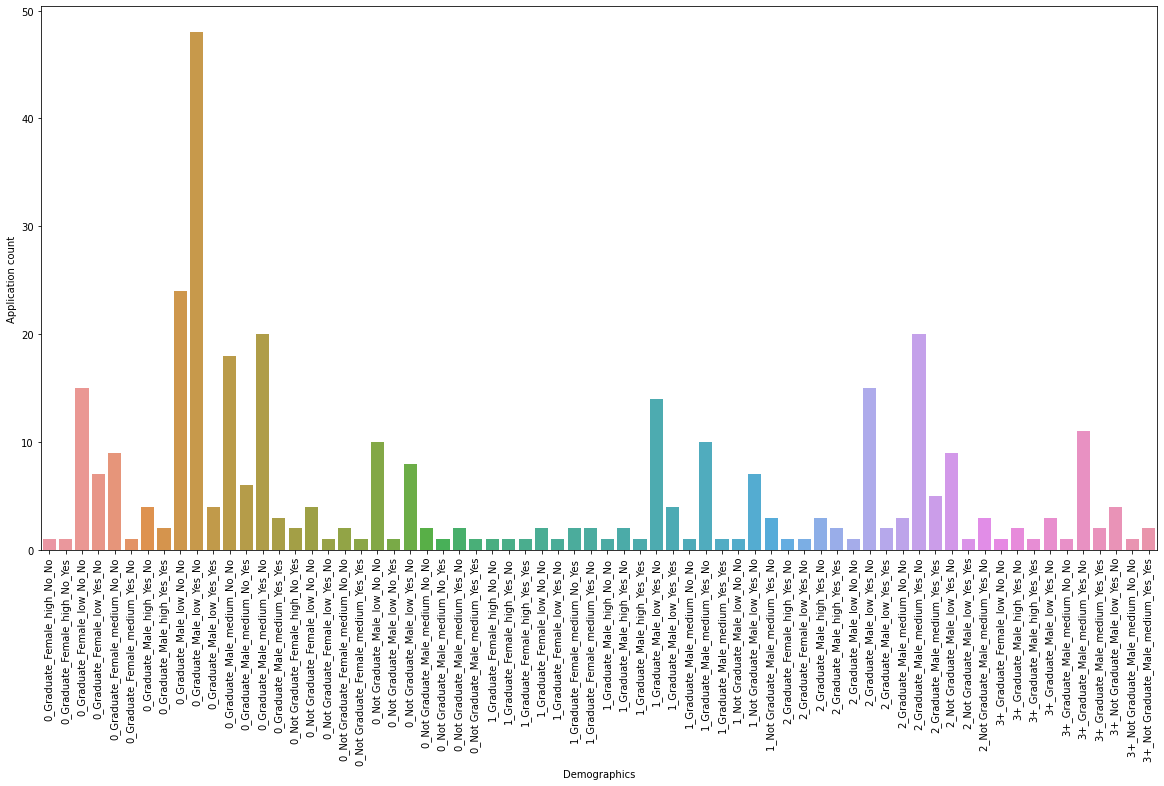

In [17]:
plt.figure(figsize = (20,10))
sb.barplot(x='Demographics', y = 'Application_ID', data = pd_g)
plt.xticks(rotation=90)
plt.ylabel('Application count')
